<h1>Final Calculations</h1>

<h3>Introduction</h3>
If a zombie apocalypse were to occur, the likelihood of survivng would be slim. A person would be more likely to turn into a zombie. Therefore, our way of determining the best neighborhood in Pittsburgh would be the best place for a zombie to survive. If a zombie apocalypse were to occur, the likelihood of survivng would be slim. A person would be more likely to turn into a zombie. Therefore, our way of determining the best neighborhood in Pittsburgh would be the best place for a zombie to survive. In order to determine the best neighborhood in Pittsburgh for a zombie to survive, we considered what a zombie would need to survive. In many works center around zombies, the zombies have the primary motivation of consuming humans. We decided that the best neighborhood for zombie survival would be the neighborhood with the best access to food. Neighborhoods best for zombies would be neighborhoods with a high density of people, neighborhoods with easy access to people, and neighborhoods that provided the most food per human consumed. With this in mind, the metrics we decided on to determine the best neighborhood were population density, Walk Scores, and obesity rate.

### The Metric
By analyzing our main metric, the survival difficulty for zombies, we developed the three sub-metrics: population density, obesity rate, and Walk Scores. The first sub-metric searches for the area with the highest population density, where enormous food is provided to our zombies; the second sub-metric seeks the area with the highest obesity rate, where humans tend to be easier to catch and larger in size; the last sub-metric explores the area with the highest Walk Score, or easiest access to amenities, where human survivors (or zombie food) like to approach for resources. We measure these three aspects of the neighborhoods to determine the one that provides the best environment for zombies to survive in Pittsburgh. 
Datasets used include [Population Density 2010](https://data.wprdc.org/dataset/pgh/resource/d5573eb6-a647-42b4-8b17-6e4787e48eeb), [Allegheny County Obesity Rates](https://data.wprdc.org/dataset/allegheny-county-obesity-rates), [Allegheny County Walk Scores](https://data.wprdc.org/dataset/allegheny-county-walk-scores), [2010 Census Tracts](https://data.wprdc.org/dataset/2010-census-tracts), and [Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2).

### Combining and Analyzing Data
We exported all of our code from each of our datasets to this notebook to merge them all. Once they were all merged, we decided to rank them individually by each metric to determine which neighborhood was best. So the highest neighborhood of each metric ranking corresponding to 1, we combined them into an overall ranking where the best neighborhoods would have the lowest overall ranking value. We decided to do it this way because we ran into numerous struggles when sorting by multiple metrics.

#### Importing and Organizing Data to Merge

In [2]:
# load pandas, geopandas, and matplotlib
import pandas as pd
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

# load data
neighborhoods = gpd.read_file('Neighborhoods/Neighborhoods_.shp')
obesity_data_pandas = pd.read_csv("obesity-ac-2006-2010censustracts.csv", index_col="stname")
popden = pd.read_csv("population-density.xls.csv",index_col = "Neighborhood")
censusTract = pd.read_csv("https://data.wprdc.org/datastore/dump/9756af5f-3320-4601-84e2-347d64071e25")
walkScore = pd.read_csv("https://data.wprdc.org/dataset/4d3d4324-b32a-4519-b56f-cee2340057bf/resource/"
                                       + "682b1df1-a63b-4413-9362-ba077af63baa/download/walkscorect.xls-walk-score-by-ct.csv")

#### Population Density

In [3]:
# changes pop. 2010 and land area(acres) from strings to int/float
popden['Pop. 2010'] = popden['Pop. 2010'].astype(int)
popden['Land Area (acres)'] = popden['Land Area (acres)'].astype(float)

# ranks population, land area, and final ranking
popden['Pop. 2010 Ranking'] = popden['Pop. 2010'].rank(ascending = False)
popden['Land Area Ranking'] = popden['Land Area (acres)'].rank(ascending = False)
popden['Average Ranking'] = (popden['Pop. 2010 Ranking'] + popden['Land Area Ranking'])/2

# filters data to display only pop. 2010, land area(acres), and rankings
rpopden = popden.iloc[:,[8,16,33,34,35]]

# sorts data by final ranking
rpopden.sort_values(by = ['Average Ranking']).head(10)

,Pop. 2010,Land Area (acres),Pop. 2010 Ranking,Land Area Ranking,Average Ranking
Neighborhood,,,,,
Squirrel Hill South,15110,1709.44,1.0,1.0,1.0
Brookline,13214,1332.48,3.0,2.0,2.5
Carrick,10113,1070.72,6.0,5.0,5.5
Squirrel Hill North,11363,782.08,4.0,9.0,6.5
Beechview,7974,934.40,9.0,7.0,8.0
Mount Washington,8799,729.60,7.0,12.0,9.5
Shadyside,13915,589.44,2.0,20.0,11.0
Lincoln-Lemington-Belmar,4883,1159.68,20.0,3.0,11.5
Brighton Heights,7247,714.88,11.0,13.0,12.0


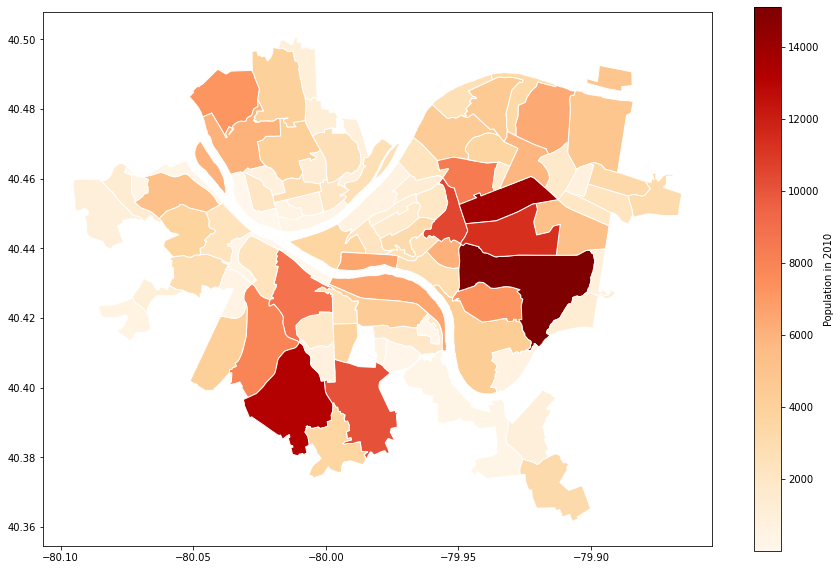

In [4]:
# display population data
population_map = neighborhoods.merge(rpopden, how='left', left_on='hood', right_on='Neighborhood')
population_map.plot(column='Pop. 2010',                            # set the data to be used for coloring
                       cmap='OrRd',                                   # choose a color palette
                       edgecolor="white",                             # outline the districts in white
                       legend=True,                                   # show the legend
                       legend_kwds={'label': "Population in 2010"},   # label the legend
                       figsize=(15, 10),                              # set the size
                       ) 

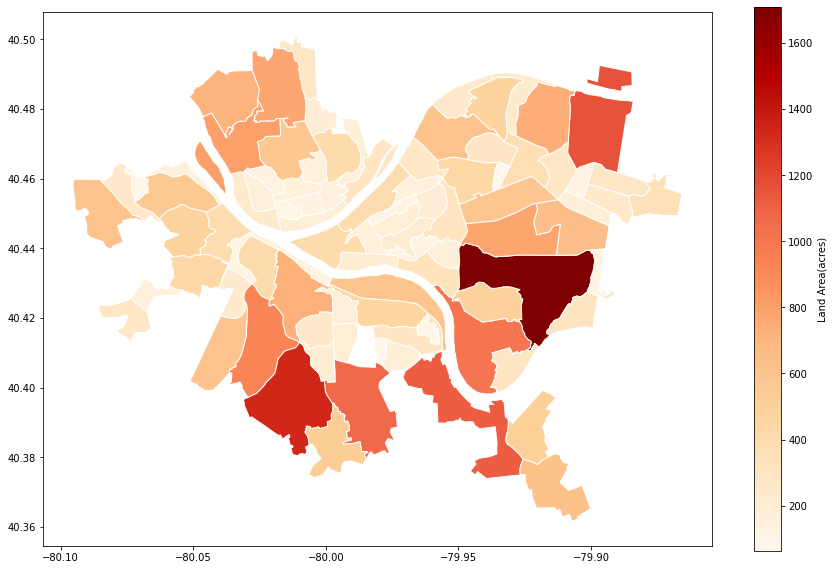

In [7]:
# displays land area data
landArea_map = neighborhoods.merge(rpopden, how='left', left_on='hood', right_on='Neighborhood')
landArea_map.plot(column= 'Land Area (acres)',                   # set the data to be used for coloring
                       cmap='OrRd',                                   # choose a color palette
                       edgecolor="white",                             # outline the districts in white
                       legend=True,                                   # show the legend
                       legend_kwds={'label': "Land Area(acres)"},     # label the legend
                       figsize=(15, 10),                              # set the size
                       ) 

#### Walk Score

In [15]:
# Organizing walk score data. (Look at walkscore notebook for more information)
censusTract = censusTract[['tractce10','hood']]

censusTract.rename(columns={'tractce10': 'Census Tract'}, inplace=True)

walkScore = pd.merge(censusTract, walkScore)

# Display the new data table. 
walkScore.rename(columns={'hood': 'Neighborhood'}, inplace=True)
walkScore = walkScore.groupby("Neighborhood").mean()['Walk Score']
walkScore.reset_index()

,Neighborhood,Walk Score
0,Allegheny West,86.0
1,Allentown,63.0
2,Arlington,26.0
3,Banksville,48.0
4,Bedford Dwellings,77.0
...,...,...
74,Upper Hill,74.0
75,Upper Lawrenceville,49.0
76,West Oakland,71.0
77,Westwood,54.0


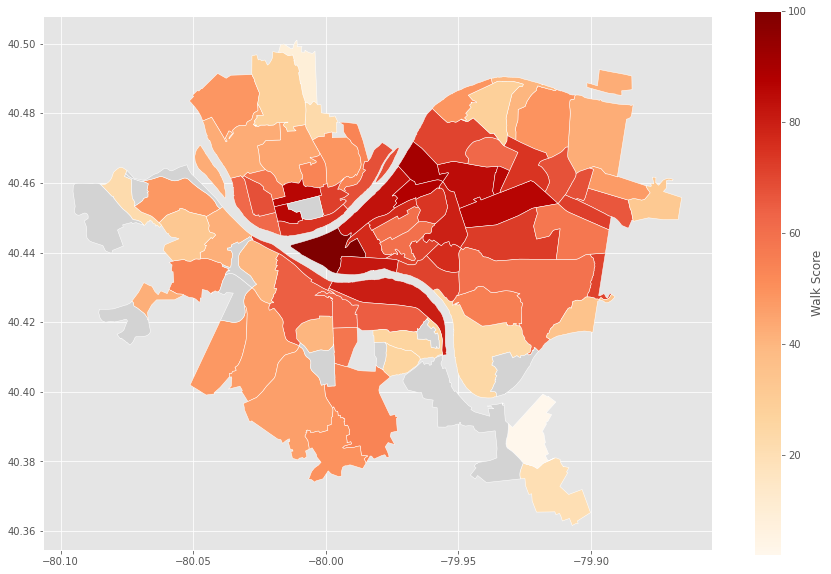

In [21]:
# Merge Walk Score data with the neighborhood map
walkScore_map = neighborhoods.merge(walkScore, how='left', left_on='hood', right_on='Neighborhood')

# Draw the map according to Walk Scores
walkScore_map.plot(column='Walk Score',
               cmap='OrRd', 
               edgecolor="white", 
               legend=True, 
               legend_kwds={'label': "Walk Score"}, 
               figsize=(15, 10), 
               missing_kwds={"color": "lightgrey"} 
               )

#### Obesity

In [25]:
# filter obesity rates by neighborhood and sort from highest rate to lowest rate
obesity_data_pandas.rename(columns={'City Neighborhood': 'Neighborhood'}, inplace=True)
obesity_rates_by_neighborhood = obesity_data_pandas.groupby('Neighborhood').mean()['2006-2010 estimate of obesity']
obesity_rates_by_neighborhood.sort_values(ascending=False).reset_index().head(20)

,Neighborhood,2006-2010 estimate of obesity
0,Northview Heights,0.922932
1,Fairywood,0.820311
2,California Kirkbride,0.771046
3,Saint Clair,0.699500
4,Terrace Village,0.674103
5,Central Business District,0.668012
6,Bedford Dwellings,0.636222
7,Homewood South,0.609697
8,Middle Hill,0.608099
9,Homewood North,0.596425


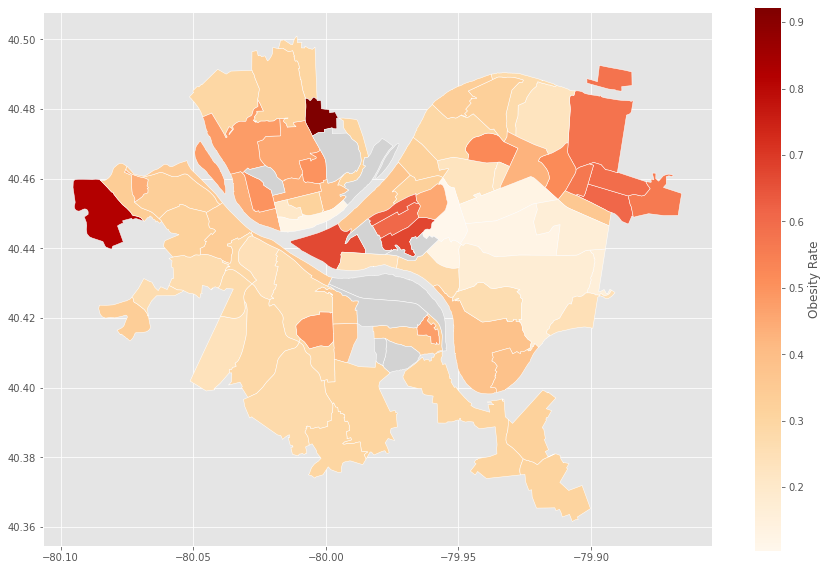

In [26]:
# merge neighborhood obesity data with neighborhood map
obesity_map = neighborhoods.merge(obesity_rates_by_neighborhood, how='left', left_on='hood', 
                                        right_on='Neighborhood')

# draw colored map of neighborhoods with obesity rate
obesity_map.plot(column='2006-2010 estimate of obesity', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor='white',        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': 'Obesity Rate'}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={'color': 'lightgrey'} # set disctricts with no data to gray
               )

<h4>Merging Data by Neighborhood</h4>

In [27]:
# merge data by neighborhood
merged_dataset = pd.merge(pd.merge(rpopden['Average Ranking'], walkScore.rank(ascending=False), on='Neighborhood'), 
                          obesity_rates_by_neighborhood.rank(ascending=False), on='Neighborhood')
merged_dataset

,Average Ranking,Walk Score,2006-2010 estimate of obesity
Neighborhood,,,
Allegheny West,84.00,6.0,82.0
Allentown,55.50,35.0,37.0
Arlington,48.50,72.5,43.0
Banksville,21.25,54.5,78.0
Bedford Dwellings,75.00,13.5,7.0
...,...,...,...
Terrace Village,46.00,38.5,5.0
Upper Hill,56.50,18.0,22.0
Upper Lawrenceville,47.00,51.5,42.0


#### Ranking Neighborhoods

In [28]:
merged_dataset['Overall Ranking'] = (merged_dataset['Average Ranking'] + merged_dataset['Walk Score'] 
                                     + merged_dataset['2006-2010 estimate of obesity']) / 3
overall_ranking = merged_dataset['Overall Ranking'].sort_values(ascending=True)
overall_ranking.reset_index().head(10)

,Neighborhood,Overall Ranking
0,Central Business District,12.833333
1,East Liberty,23.500000
2,Lincoln-Lemington-Belmar,27.833333
3,Central Northside,28.500000
4,Garfield,28.833333
5,Terrace Village,29.833333
6,Homewood South,30.166667
7,Marshall-Shadeland,30.333333
8,Bedford Dwellings,31.833333
9,Upper Hill,32.166667


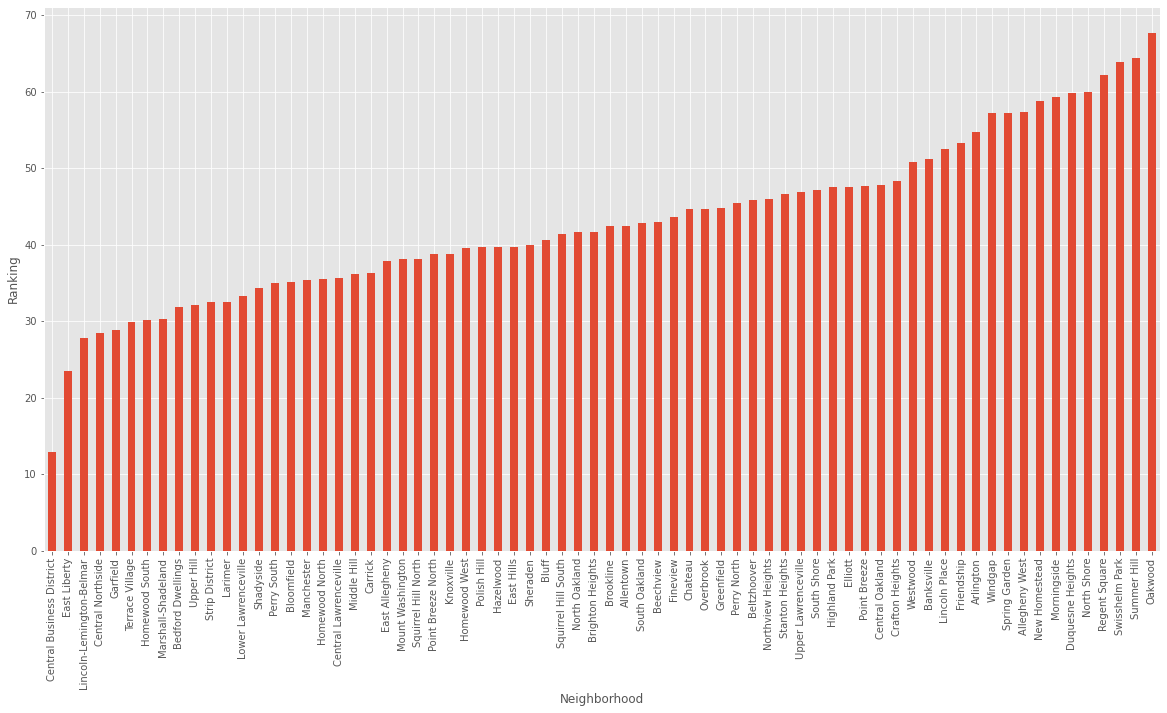

In [30]:
# display data as a bar graph to compare ranking
plt.style.use('ggplot')
plt.ylabel("Ranking")
overall_ranking.plot(kind='bar', figsize=(20, 10))

<h3>Conclusion</h3>


After combining our data, we determined the best neighborhood for zombie survival in Pittsburgh is the Central Business District. The Central Business District in Pittsburgh had the overall best obesity rate, population density, and Walk Score for a zombie to survive in. In Pittsburgh's Central Business District, a zombie would have access to many humans to consume due to the population density. A zombie would also be able to access more humans due to the high Walk Score. In addition, the humans the zombie would consume would on average provide a greater quantity of food due to the high obesity rate in the area. Overall, the Central Business District would be the greatest neighborhood in Pittsburgh for a zombie to survive according to the population density, Walk Score, and obesity rates.